<a href="https://colab.research.google.com/github/MuKimLong/-Analyze-US-citizens---EDA-Project/blob/main/ML_1(Simple_Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6) # Notebboktaki tüm görselleri 10,6 boyutuna getirir.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


we r callin';

independent variable = feature = estimator = attribute = input = explanatory variable

dependent variable = target  = label = output = response variable

rows = observation, sample

**For this dataset;**

**features** = TV + radio + newspaper

**target** = sales

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000



# If the standard deviation is greater than the mean value, we can consider outlier values in our data

# If there is a gap between the "min" and the first quarter of 25% and/or the 3rd quarter of 75% and the max, it infers that there may be a limited number of outlier values, although not in the whole of our data.

# describe() doesnt return categorical variables, only numeric

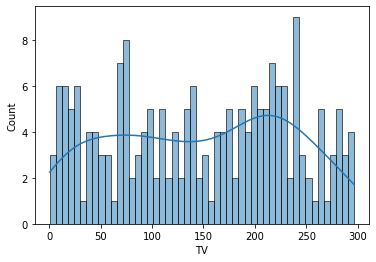

In [6]:
sns.histplot(df.TV, bins = 50, kde = True);

## checkin' outliers

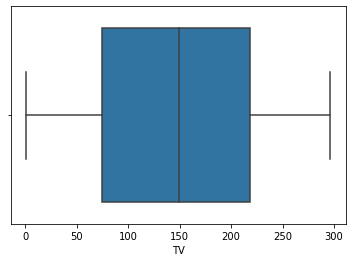

In [8]:
sns.boxplot(df.TV);

# If an observation in ML is real-world data, we do not take an outlier approach to that observation. The outlier approach in ML is expressed by seeking an answer to the question of whether the outlier data you have is sufficient for training. Outliers are interpreted based on the number of values outside the normal distribution or out of the boxplot whiskers. If this number is low, it can be said that there is not enough data for training and an outlier approach can be made.

In [7]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df
## feature engineering
## Create new independent variable (feature)

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [9]:
df = df.iloc[:,[0,1,2,4,3]]
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


# we have placed our target column in the last row by following the above process. Thus, our work will be easier when reading the dataset. This is a common approach.

In [10]:
df["sales"].corr(df["TV"])

0.7822244248616061

# If there is a meaningful relationship between feature and target in simple linear regression, this data is suitable for linear regression.

**Correlation**

# Correlation shows the relationship between featurs. It gives us inferences that the features decrease/increase together or as one decreases/increases while the other increases/decreases.

# correlation does not provide an inference about how much a 1 degree increase in air temperature affects (increases or decreases) ice cream sales, as in the example above. It only informs that if the air temperature increases, ice cream sales will also increase.

# Regression responds to how much ice cream sales will increase/decrease with increases/decreases of 1 degree or more.

In [11]:
for i in df.drop(columns ="sales"):
    print(f"corr between sales and {i:<12}:  {df.sales.corr(df[i])}")

corr between sales and TV          :  0.7822244248616061
corr between sales and radio       :  0.5762225745710551
corr between sales and newspaper   :  0.22829902637616528
corr between sales and total_spend :  0.8677123027017427


# In case of simple linear regression, if there is a significant-high corr between feature and target, this data is more suitable for linear regression. Here we determine which feature is more suitable for simple linear regression.

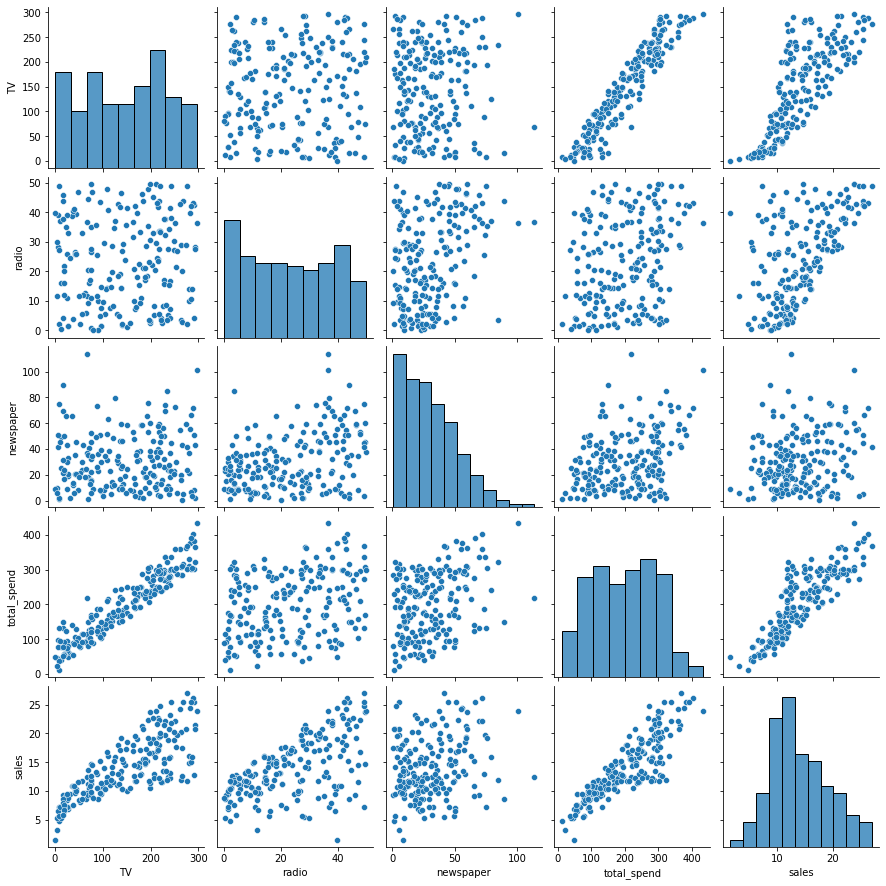

In [12]:
sns.pairplot(df);

# On the scatter plot, it can be seen that the highest corr is between total spend and spends.

# By positioning the target at the end of the df, the corr evaluation between target and features can be made easier on the bottom line.

In [13]:
df.corr()

,TV,radio,newspaper,total_spend,sales
TV,1.000000,0.054809,0.056648,0.945330,0.782224
radio,0.054809,1.000000,0.354104,0.293211,0.576223
newspaper,0.056648,0.354104,1.000000,0.343059,0.228299
total_spend,0.945330,0.293211,0.343059,1.000000,0.867712
sales,0.782224,0.576223,0.228299,0.867712,1.000000


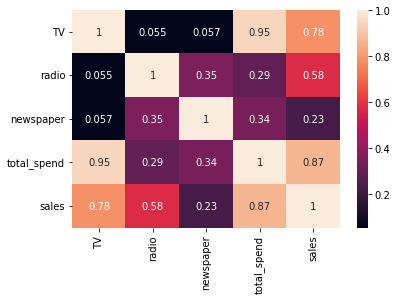

In [14]:
sns.heatmap(df.corr(), annot=True);

In [15]:
df = df[['total_spend', 'sales']]

df

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


# We have determined that total spend is more suitable for simple linear regression since it is between target and the most meaningful corr total spend. In this context, we are re-establishing our new df with total spend and sales.

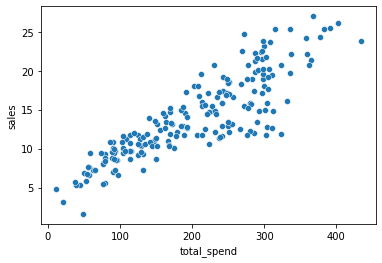

In [16]:
## Plotting the relationship between independent variable and dependent variable 

sns.scatterplot(x ="total_spend", y = "sales", data=df);

In [17]:
corr = df["sales"].corr(df["total_spend"])
corr

## Correlation between independent variable and dependent variable

0.8677123027017427

In [18]:
df["total_spend"].corr(df["sales"])

0.8677123027017427

**Coefficient of determination (R2)**

In [19]:
R2_score = corr**2
R2_score

0.7529246402599608

# R2_score answers the questions "How much of the change in the target can I explain with the current features we have" or "How much of the information do I have to predict the target correctly".

**## Linear Regression**

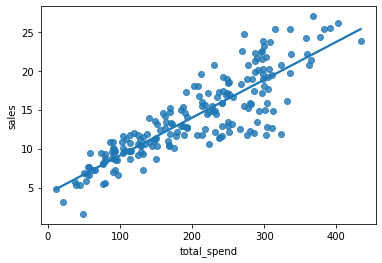

In [20]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None);

# Draw the best line below via y_pred

# We draw our best line for this data using the regression plot of seaborn.



**Splittin the Dataset**

In [21]:
## Splitting the dataset into X(independent variables) and y (dependent variable)

X = df["total_spend"]
y = df["sales"]

**Determination of coefficients (slope and intercept)**

In [22]:
np.polyfit(X, y, deg=1)

# When the first degree of polynomial regression is linear regression, we choose degree=1

array([0.04868788, 4.24302822])

# We determine the coefficients of the featurs using the polyfit function from the numpy library.


In [23]:
slope, intercept = np.polyfit(X, y, deg=1)

# Indicates the value of y when slope feature coefficient intercept X=0.

In [24]:
print("slope    :", slope)
print("intercept:", intercept)

slope    : 0.04868787931904817
intercept: 4.243028216036326


In [25]:
b1, b0 = np.polyfit(X, y, deg=1)

# b1 = slope, b0= intercept

In [26]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.04868787931904817
b0 : 4.243028216036326


In [27]:
X

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

In [28]:
y_pred = b1*X + b0

In [29]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2, "ABS":abs(y-y_pred)}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE,ABS
0,22.1,20.655712,1.444288,2.085967,1.444288
1,10.4,10.518896,-0.118896,0.014136,0.118896
2,9.3,10.689303,-1.389303,1.930164,1.389303
3,18.5,16.478292,2.021708,4.087302,2.021708
4,12.9,16.414998,-3.514998,12.355211,3.514998
...,...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098,0.645057
196,9.7,9.462369,0.237631,0.056469,0.237631
197,12.8,13.625183,-0.825183,0.680926,0.825183
198,25.5,23.318939,2.181061,4.757026,2.181061


# We display the actual values, estimated values, and LSE and ABS values used to calculate residuals and error metrics calculated over residuals in the same df.

# LSE penalizes poor estimates as it squares residuals, while ABS does not penalize because it takes absolute values.

# When we square the residuals and divide by the number of observations, it gives the square of the average error made on the basis of observations.
# Metrics obtained from LSE are highly preferred for interpretation, as they penalize bad predictions.
# Gives us insights that the model is making bad predictions.

# When we take the absolute value of the residuals and divide by the number of observations, it gives the absolute value of the average error made on the basis of observations. Metrics obtained from ABS are not preferred for interpretation, as they do not penalize bad predictions.

# If there is a gap between the metric we obtained from ABS and the metric we obtained from LSE, we can understand that the model makes very bad predictions.

In [30]:
df_2.residual.sum().round()

-0.0

# After the best fit line we have obtained, the sum of the differences (residules) between the estimations and the real values is always 0.

**Prediction with simple linear regression**

In [31]:
potential_spend = np.linspace(0, 500, 100)
potential_spend

# linspace func to get 100 different spend amounts from 0 to 500. we are using. 
# And we assign these values to the potential_spend variable.

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [32]:
predicted_sales_lin = b1* potential_spend + b0
predicted_sales_lin

# We expand our estimations by multiplying the potential_spend variable by the coefficient b1 and adding b0 to each.
# We don't need to do these operations manually, sclerarn will do them all automatically

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21